## Coding Challenge #2

In this coding challenge, we are going to use the "Index, Violent, Property, and Firearm Rates By County: Beginning 1990" data set available from the Data.Gov website (https://catalog.data.gov/dataset?groups=local&organization_type=State+Government#topic=local_navigation).

There are a few objectives you need to accomplish:

1) Examine the data set for any missing values. The attributes of interest are 'Violent Count', 'Property Count', and 'Population'

2) If there are any missing values, replace it with the median for that specific attribute within the corresponding County.

For example if the 'Violent Count' attribute for the county of Albany has missing values, then replace it with the median of the 'Violent Count' for the county of Albany
Note: If there are no missing values, you can use the data set as is

3) Construct a box plot to surface the 25%, 50% and 75% percentiles of the 'Violent Count' by County from year 1990 to 2016 - just hone in on the following three counties: Bronx, New York and Queens

4) Compute the Variance and Standard Deviation of the 'Violent Count' by County from year 1990 to 2016 - just hone in on the following three counties: Bronx, New York and Queens

5) Contruct a Bee Swarm Plot to surface the spread of the 'Violent Count' by County from year 1990 to 2016 - just hone in on the following three counties: Bronx, New York and Queens

6) Hone in on the data set for the Year 2016. How does the 'Violent Count' and the 'Population' vary together? Construct a scatter plot that plots the 'Violent Count' v/s the Total Population' for each of the 3 Counties. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance.

7) Hone in on the data set for the Year 2016. How does the 'Violent Count' and the 'Property Count' vary together? Construct a scatter plot that plots the 'Violent Count' v/s the Total Property Count' for each of the 3 Counties. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance.

8) Compute the Correlation Coefficient between the 2 variable i.e. 'Violent Count' and the 'Population' for the county of Bronx


In [0]:

!wget https://data.ny.gov/api/views/34dd-6g2j/rows.csv?accessType=DOWNLOAD -O /tmp/Firearm_rates.csv

--2018-05-01 17:20:40--  https://data.ny.gov/api/views/34dd-6g2j/rows.csv?accessType=DOWNLOAD
Resolving data.ny.gov (data.ny.gov)... 52.206.140.199
Connecting to data.ny.gov (data.ny.gov)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘/tmp/Firearm_rates.csv’

/tmp/Firearm_rates.     [ <=>                ]  99.56K  --.-KB/s    in 0.03s   

Last-modified header invalid -- time-stamp ignored.
2018-05-01 17:20:41 (3.72 MB/s) - ‘/tmp/Firearm_rates.csv’ saved [101948]



In [0]:
import numpy as np
import pandas as pd
# read the file into a dataframe
data = pd.read_csv("/tmp/Firearm_rates.csv")
print (data.columns)
print (data.head(10))

Index(['County', 'Year', 'Population', 'Index Count', 'Index Rate',
       'Violent Count', 'Violent Rate', 'Property Count', 'Property Rate',
       'Firearm Count', 'Firearm Rate'],
      dtype='object')
   County  Year  Population  Index Count  Index Rate  Violent Count  \
0  Albany  2016    308401.0         8764      2841.8           1102   
1  Albany  2015    308613.0         8635      2798.0           1041   
2  Albany  2014    308166.0         9181      2979.2           1003   
3  Albany  2013    306300.0         9457      3087.5           1006   
4  Albany  2012    305204.0         9975      3268.3           1012   
5  Albany  2011    305571.0        10725      3509.8           1163   
6  Albany  2010    295267.0        11036      3737.6           1182   
7  Albany  2009    298400.0        10613      3556.6           1289   
8  Albany  2008    299789.0        10750      3585.9           1356   
9  Albany  2007    297154.0        10584      3561.8           1468   

   Violent R

In [0]:
# check for missing or null values

print (data.isnull().sum())

# none of the columns of interest has null values.

County             0
Year               0
Population         0
Index Count        0
Index Rate         0
Violent Count      0
Violent Rate       0
Property Count     0
Property Rate      0
Firearm Count     75
Firearm Rate      75
dtype: int64


In [0]:
data.Year.unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1994, 1993, 1992, 1991, 1990])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

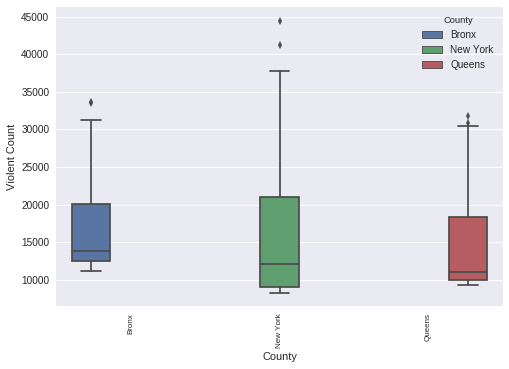

In [0]:
#Construct a box plot to surface the 25%, 50% and 75% percentiles of the 'Violent Count' by County from year 1990 to 2016 - 
#just hone in on the following three counties: Bronx, New York and Queens
import matplotlib.pyplot as plt
import seaborn as sns

data1 = data.loc[data['County'].isin(["Bronx","New York","Queens"])]
sns.boxplot(x="County", y="Violent Count", data=data1, hue = "County")
plt.xticks(fontsize = 8, rotation = 90)

#from the boxplot, it can be seen that, median of Bronx is higher, second is New york and last is Queens county. 
#All the three county's has outliers i.e, values greater than 1.5 times of median.


In [0]:
#Compute the Variance and Standard Deviation of the 'Violent Count' by County from year 1990 to 2016 - 
#just hone in on the following three counties: Bronx, New York and Queens
data2 = data1.groupby("County")['Violent Count']

mean = data2.mean()
print ("mean for each county")
print (mean)
print ("\n")

stdeviation = data2.std()
print ("Standard Deviation for each county")
print (stdeviation)
print ("\n")

print ("Variance for each county")
varianc = data2.var()
print (varianc)
print ("\n")

print ("25th percentile for each county")
print (data2.apply(np.percentile, 25))
print ("\n")

print ("50th percentile for each county")
print (data2.apply(np.percentile, 50))
print ("\n")

print ("75th percentile for each county")
print (data2.apply(np.percentile, 75))

mean for each county
County
Bronx       17687.444444
New York    17419.888889
Queens      15510.111111
Name: Violent Count, dtype: float64


Standard Deviation for each county
County
Bronx        7447.220165
New York    11150.953282
Queens       7545.773174
Name: Violent Count, dtype: float64


Variance for each county
County
Bronx       5.546109e+07
New York    1.243438e+08
Queens      5.693869e+07
Name: Violent Count, dtype: float64


25th percentile for each county
County
Bronx       12519.0
New York     9061.5
Queens       9978.0
Name: Violent Count, dtype: float64


50th percentile for each county
County
Bronx       13817.0
New York    12179.0
Queens      11106.0
Name: Violent Count, dtype: float64


75th percentile for each county
County
Bronx       20103.5
New York    21090.0
Queens      18309.0
Name: Violent Count, dtype: float64


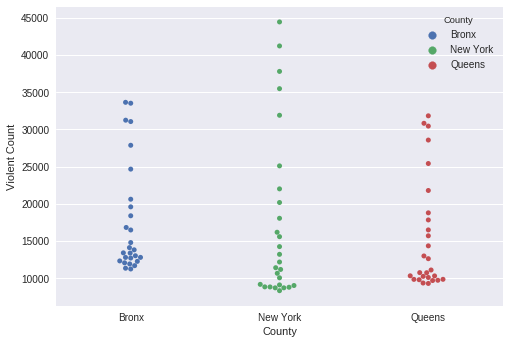

In [0]:
#Swarm plot
sns.swarmplot(x='County', y='Violent Count', data=data1, hue = 'County')
plt.xlabel('County')
plt.ylabel('Violent Count')
plt.show()

[ 7.49138233e+06 -7.55505372e+08]


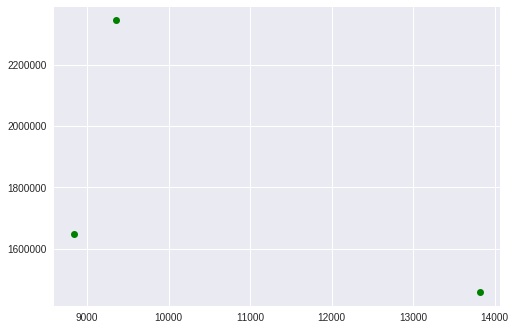

In [0]:
#Hone in on the data set for the Year 2016. How does the 'Violent Count' and the 'Population' vary together? 
#Construct a scatter plot that plots the 'Violent Count' v/s the Total Population' for each of the 3 Counties. 
#Does the Scatter Plot point to a positive covariance? Now, compute the Covariance.

data3 = data.loc[data['County'].isin(["Bronx","New York","Queens"]) & data['Year'].isin(["2016"])]
plt.plot(data3['Violent Count'],data3['Population'],'og')

covar = np.cov(data3['Violent Count'],data3['Population'])
print (covar[0])

Text(0,0.5,'Violent Count')

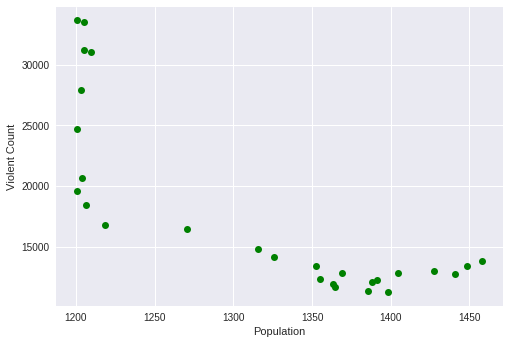

In [0]:
#data with Bronx county and all the years
data_BR = data.loc[data['County'].isin(["Bronx"])]
plt.plot(data_BR['Population']/1000,data_BR['Violent Count'],'og')

plt.xlabel("Population")
plt.ylabel("Violent Count")

Text(0,0.5,'Violent Count')

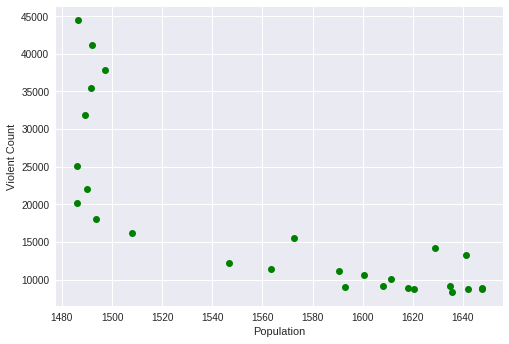

In [0]:
#data with New York county and all the years
data_NY = data.loc[data['County'].isin(["New York"])]
plt.plot(data_NY['Population']/1000,data_NY['Violent Count'],'og')

plt.xlabel("Population")
plt.ylabel("Violent Count")

#from the plot, it can be seen that, as the population increses, violent count decreases

Text(0,0.5,'Violent Count')

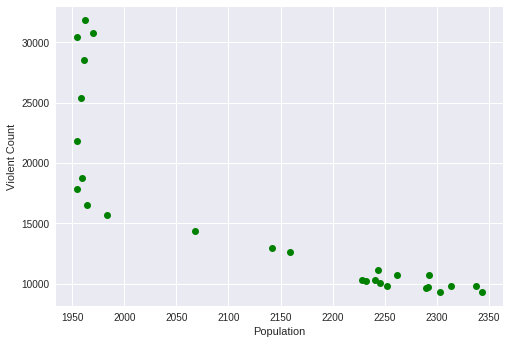

In [0]:
#data with Queens county and all the years
data_Queens = data.loc[data['County'].isin(["Queens"])]
plt.plot(data_Queens['Population']/1000,data_Queens['Violent Count'],'og') # divide by 1000 in order to display in 1000's

plt.xlabel("Population")
plt.ylabel("Violent Count")

#from the plot, it can be seen that, as the population increses, violent count decreases

covariance of Violent Count and Population for Bronx County:
-973009766.6131793


covariance of Violent Count and Population for New York County:
-570021519.4323975


covariance of Violent Count and Population for Queens County:
-973009766.6131793


covariance of Violent count and Property for Bronx County:
266045935.05555558


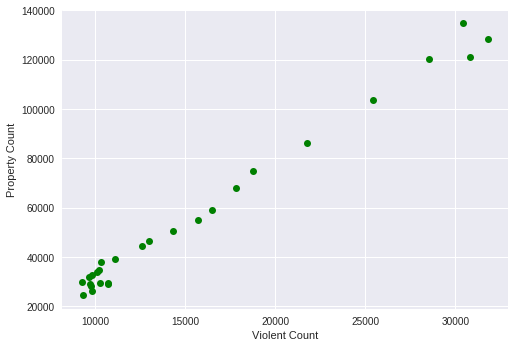

In [0]:
#Covariance is the measure of how quantities vary together
#In the case of Bronx, it is evident from the Scatter plot that the 'Violent Count' goes down as the population increases
#Suggests a negative covariance
#Let's validate that by computing the Covariance

#To compute the Covariance, you use the 'cov' function

#The 'cov' returns a 2 dimensional array where the entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y
#This 2 dimensional array is called the covariance matrix, since it structures the data as self- and covariance.

print ("covariance of Violent Count and Population for Bronx County:")
print (np.cov(data_BR['Violent Count'],data_BR['Population'])[0][1])
print ("\n")

print ("covariance of Violent Count and Population for New York County:")
print (np.cov(data_NY['Violent Count'],data_NY['Population'])[0][1])
print ("\n")

print ("covariance of Violent Count and Population for Queens County:")
print (np.cov(data_Queens['Violent Count'],data_Queens['Population'])[0][1])

plt.plot(data_BR['Violent Count'],data_BR['Property Count'],'og')
print ("\n")

covar1 = np.cov(data_BR['Violent Count'],data_BR['Property Count'])
plt.xlabel('Violent Count')
plt.ylabel('Property Count')

# from the graph, it can be seen that, as the violent count increases property count also increases and hence positively correlated.

print ("covariance of Violent count and Property for Bronx County:")
print (covar1[0][1])

In [0]:
#Compute the Correlation Coefficient between the 2 variable i.e. 'Violent Count' and the 'Population' for the county of Bronx

#The Correlation Co is computed using the np.corrcoef() function
  
#Like the np.cov(), it takes two arrays as arguments and returns a 2 dimensional array

# Entries [0,0] and [1,1] are equal to 1 since there is a storng positive correlation between the variable and itself

# The value of interest is entry [0,1]

data4 = data.loc[data['County'].isin(["Bronx"])]
corr = np.corrcoef(data4['Violent Count'],data4['Population'])
print (corr[0][1])

#There seems to be a strong negative correlation between 'Population' and 'Violent Count'

-0.802718328253374
